## Convolutional Neural Network (CNN) - Deep Learning
Son redes de aprendizaje profundo cuyo funcionamiento es semejante al de la corteza visual del cerebro humano. Su principal utilidad apunta al procesamiento de imágenes y clasificación relacionada con la detección de patrones.

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.utils.random import check_random_state
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### Ejemplo CNN
Se aplicará una CNN para predecir la distancia entre un par de puntos (x,y) y (x1,y1), uno de ellos constante.$$ d = \sqrt{(x1-x)^2 + (y1 - y)^2} $$

### Generar el conjunto de datos
Para generar el conjunto de datos se calculará la distancia entre un conjunto de 5000 puntos (x,y) aleatorios, así, el modelo de regresión se ajustará a una proporción del 80% del conjunto y el 20% restante estará destinado a la predicción.

In [2]:
def calcular_distancia(X,Y,XF,YF):
    return np.round(np.sqrt(np.power(XF-X,2)+np.power(YF-Y,2)),2)

XF = 5
YF = 12.5

rng = check_random_state(0)

X = np.round(rng.uniform(1, 11, 10000).reshape(5000, 2),2)
XFs=[[XF] for i in range(5000)]
YFs=[[YF] for i in range(5000)]
X=np.append(X, XFs, axis=1)
X=np.append(X, YFs, axis=1)
Y = calcular_distancia(X[:, 0],X[:, 1],XF,YF)
Y = Y.reshape(-1,1)

### Proceso de transformación
Es una práctica común, en las redes neuronales, normalizar el conjunto de datos de entrenamiento, pues se ha demostrado que las redes neuronales aprenden mejor con valores pequeños entre 0 y 1.

In [3]:
def transformar(X,Y):
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scale = scaler_x.fit_transform(X)
    y_scale = scaler_y.fit_transform(Y)
    return (x_scale,y_scale)

### Construcción del modelo
La construcción del modelo se encarga de definir la arquitectura de la red.
En este tipo de redes el tensor de los datos de entrada debe ser 3D, por lo cual, este tensor está configurado por el tamaño del dataset, la cantidad de datos de entrada de cada registro y la cantidad de características (en este caso 1, pues la red predecirá 1 dato (la distancia)).

In [4]:
x_scale,y_scale = transformar(X, Y)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, train_size=0.8, test_size=0.2, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, train_size=0.5, test_size=0.5, random_state=42)

n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
#print(X)
# define model
n_steps = x_train.shape[1]
#print(n_steps)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mse',tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])

### Proceso de entrenamiento, evaluación y validación del modelo
En estos procesos es imprescindible contar con una métrica que permita valorar la precisión del modelo, en este caso, **MSE y RMSE** son las métricas usadas para tal valoración.

In [5]:
x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], n_features))
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid,y_valid), verbose=0)
yhat=model.predict(x_valid, verbose=0)
rmse = np.sqrt(mean_squared_error(y_valid,yhat))
print(rmse)

0.0014444303087464264


### Gráfica de aprendizaje
Es una forma útil de visualizar el proceso de aprendizaje e identificar fenómenos como el overfetting. 

dict_keys(['loss', 'mse', 'root_mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mse', 'val_root_mean_squared_error', 'val_mean_absolute_error'])


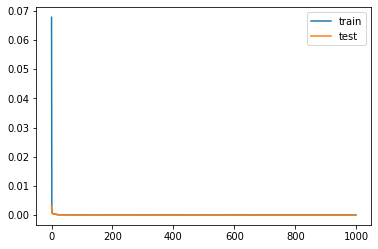

In [6]:
def graficar(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()  

print(history.history.keys())
graficar(history)

In [7]:
print("--------------EVALUACION------------------")
score = model.evaluate(x_valid,y_valid,verbose=1,return_dict=True)
print('Evaluación '+str(score))
print("")


--------------EVALUACION------------------
16/16 [==============================] - 0s 2ms/step - loss: 2.0864e-06 - mse: 2.0864e-06 - root_mean_squared_error: 0.0087 - mean_absolute_error: 0.0025
Evaluación {'loss': 2.086380163746071e-06, 'mse': 2.086380163746071e-06, 'root_mean_squared_error': 0.008735443465411663, 'mean_absolute_error': 0.002480392577126622}

